- Handwritten digit dataset with 28x28 pixels images.

- ANN to predict the digit in the image.

- This is an Multi-class classification problem.

- Since it is multi class, we'll have 10 output neurons (0 to 9 digits).

- We'll use softmax activation function in the output layer.

- Highest probability neuron will be the predicted digit.

- We'll have following:

        - 784 input neurons (28x28 pixels)

        - 1 hidden layer with 128 neurons

        - 10 output neurons

- Weights and biases in each layer:

        - Input to Hidden layer: 784x128 weights and 128 biases

        - Hidden to Output layer: 128x10 weights and 10 biases

These weights and biases may increase or decrease if we add or subtract neurons in the layers.

In [37]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [38]:
(xTrain, yTrain), (xTest, yTest) = keras.datasets.mnist.load_data()

In [39]:
xTrain.shape

(60000, 28, 28)

In [40]:
xTrain[0]               # 1st image with pixel value

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [41]:
xTest.shape

(10000, 28, 28)

In [42]:
yTrain              # label for images of xTest

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

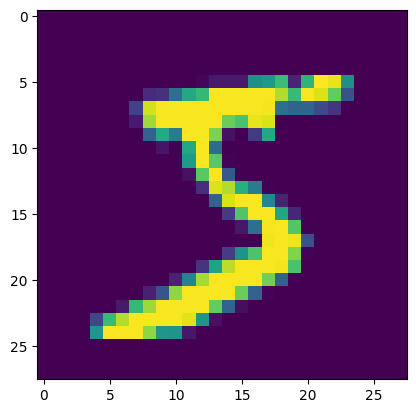

In [43]:
import matplotlib.pyplot as plt              # To view images

plt.imshow(xTrain[0])

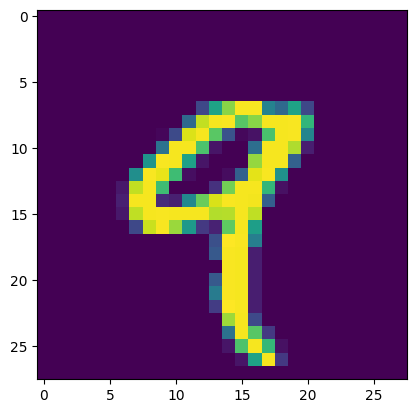

In [44]:
plt.imshow(xTrain[4])

### Changing the values in a similar range i.e. between 0 and 1

In [45]:
xTrain = xTrain/255
xTest = xTest/255

In [46]:
xTrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [47]:
model = Sequential()

# First we have to flatten the data (Converting 2d to 1d) because right now we have data in 28x28 format but we'll have 784 input neurons
# For conversion into 1d, we'll use flatten()

model.add(Flatten(input_shape = (28, 28)))          # Input Layer ; Output will be given to dense, hense we don't have to specify input layers
model.add(Dense(128, activation='relu'))            # Hidden Layer ; Activation is called identity function
model.add(Dense(10, activation='softmax'))            # Output layer ; We have 10 classes, hence 10 neurons in output layer ; Activation is called softmax function because of multi class classification

d:\Programming lang\PYTHON\Deep Learning Notebooks\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

- 784 inputs going into 128 neurons with 128 biases, we'll have 784x128 + 128 = 100480 parameters and so on for next layer.

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam')

In [14]:
model.fit(xTrain, yTrain, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4839 - val_loss: 0.1586
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1391 - val_loss: 0.1112
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0885 - val_loss: 0.1042
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0665 - val_loss: 0.0953
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0456 - val_loss: 0.0852
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0361 - val_loss: 0.0915
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0286 - val_loss: 0.0887
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0216 - val_loss: 0.0976
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0189 - val_loss: 0.0919
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0145 - val_loss: 0.0918


In [15]:
model.get_weights()

[array([[ 0.00544673,  0.0737539 ,  0.05661555, ..., -0.05006339,
          0.07456692,  0.01615524],
        [ 0.06827066,  0.03947224, -0.01561777, ...,  0.02081286,
         -0.01180412,  0.07574909],
        [-0.00555166,  0.07682093,  0.01036769, ..., -0.05862452,
         -0.02864844, -0.00642364],
        ...,
        [ 0.06489985,  0.04850883,  0.01546495, ...,  0.04282453,
          0.01883852,  0.06063574],
        [ 0.01264309,  0.05197857, -0.04509266, ..., -0.04551775,
          0.02198301,  0.0184904 ],
        [-0.07199438, -0.02648829,  0.07995714, ...,  0.07190558,
          0.06968565,  0.02057249]], dtype=float32),
 array([ 0.09720773,  0.05822689, -0.13014095,  0.06659791,  0.03953428,
         0.23913103,  0.21460758,  0.21151738,  0.20501874, -0.0641564 ,
         0.10587682,  0.1310716 ,  0.01103451,  0.08234391,  0.04837841,
        -0.00230299, -0.11964264,  0.184663  , -0.12126631,  0.07571154,
         0.02931831,  0.04227985,  0.0690993 , -0.06400616, -0.080

In [16]:
yProbability = model.predict(xTest)
yProbability            # Gives the probability of each number

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.39692926e-10, 5.46483562e-12, 5.82180562e-08, ...,
        9.99998689e-01, 1.38577825e-08, 1.11323708e-07],
       [4.44222946e-13, 2.26093198e-06, 9.99997735e-01, ...,
        5.79801464e-17, 1.62751861e-11, 1.31886315e-21],
       [1.62618523e-08, 9.99512553e-01, 9.39040547e-06, ...,
        8.29387936e-05, 3.86937405e-04, 1.53676041e-08],
       ...,
       [1.44463322e-16, 1.08231159e-14, 1.27782382e-14, ...,
        4.79073980e-09, 7.59406138e-09, 3.13938904e-06],
       [4.88538507e-12, 4.20106319e-14, 6.50851051e-17, ...,
        1.37159305e-12, 7.66019284e-08, 2.49404404e-16],
       [2.52998685e-13, 5.92303869e-17, 7.67786269e-12, ...,
        3.60266884e-20, 3.76720411e-13, 3.11585982e-15]], dtype=float32)

In [17]:
ypred = yProbability.argmax(axis=1)               # Selecting the number with max prob

In [18]:
ypred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(yTest, ypred)

0.9789

- We can improve the accuracy with change in architecture

In [20]:
model2 = Sequential()

model2.add(Flatten(input_shape = (28, 28)))          
model2.add(Dense(128, activation='relu'))            
model2.add(Dense(32, activation='relu'))            
model2.add(Dense(10, activation='softmax'))          

d:\Programming lang\PYTHON\Deep Learning Notebooks\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.utils import to_categorical

yTrain = to_categorical(yTrain)

model2.compile(loss = 'categorical_crossentropy', optimizer='Adam')

history = model2.fit(xTrain, yTrain, epochs=25, validation_split=.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4941 - val_loss: 0.1503
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1245 - val_loss: 0.1177
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0794 - val_loss: 0.1030
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0582 - val_loss: 0.1045
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0481 - val_loss: 0.0949
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0383 - val_loss: 0.1012
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0261 - val_loss: 0.1020
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0214 - val_loss: 0.1166
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0205 - val_loss: 0.0992
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0140 - val_loss: 0.1095
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0150 - val_loss: 0.1018
Epoch 12/25
1500/1500 ━━━━━━━━

In [23]:
# model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam')
# history = model2.fit(xTrain, yTrain, epochs=25, validation_split=.2)

In [24]:
yProbability2 = model2.predict(xTest)
yProbability2           

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.3592920e-17, 1.4945663e-16, 2.5589237e-11, ..., 1.0000000e+00,
        4.2540837e-16, 5.9678498e-11],
       [5.7612218e-20, 2.8139223e-13, 1.0000000e+00, ..., 6.0026974e-24,
        4.2907004e-18, 7.2970500e-20],
       [1.2092396e-11, 9.9998343e-01, 4.3366901e-09, ..., 5.3246345e-07,
        1.6062630e-05, 1.4305101e-11],
       ...,
       [3.4802544e-29, 1.9218409e-20, 3.9003353e-35, ..., 1.1409157e-17,
        3.3828497e-17, 1.9555149e-09],
       [2.1315155e-13, 7.2225157e-23, 3.1253658e-26, ..., 8.7330296e-19,
        4.5217348e-08, 2.9196338e-20],
       [1.2447026e-12, 1.1059526e-17, 1.2979419e-16, ..., 1.3827694e-24,
        8.0509932e-17, 6.6819305e-14]], dtype=float32)

In [25]:
ypred2 = yProbability2.argmax(axis=1)               # Selecting the number with max prob

In [26]:
accuracy_score(yTest, ypred2)

0.9737

In [27]:
history.history

{'loss': [0.28019705414772034,
  0.11856326460838318,
  0.08077608048915863,
  0.06131035462021828,
  0.04727736860513687,
  0.03987032175064087,
  0.03136148303747177,
  0.025368496775627136,
  0.0234647449105978,
  0.016166551038622856,
  0.01615169458091259,
  0.017201131209731102,
  0.014489110559225082,
  0.011799256317317486,
  0.011312311515212059,
  0.010628561489284039,
  0.012797473929822445,
  0.009725277312099934,
  0.009987483732402325,
  0.008488464169204235,
  0.010364945977926254,
  0.007086585275828838,
  0.007202125620096922,
  0.009506871923804283,
  0.008169449865818024],
 'val_loss': [0.150263249874115,
  0.11767154932022095,
  0.10303400456905365,
  0.10449349135160446,
  0.09489507973194122,
  0.10122908651828766,
  0.10195551812648773,
  0.11663089692592621,
  0.09924084693193436,
  0.10951795428991318,
  0.10180410742759705,
  0.10555882006883621,
  0.10747086256742477,
  0.12229008227586746,
  0.13564427196979523,
  0.12458261847496033,
  0.16933763027191162,


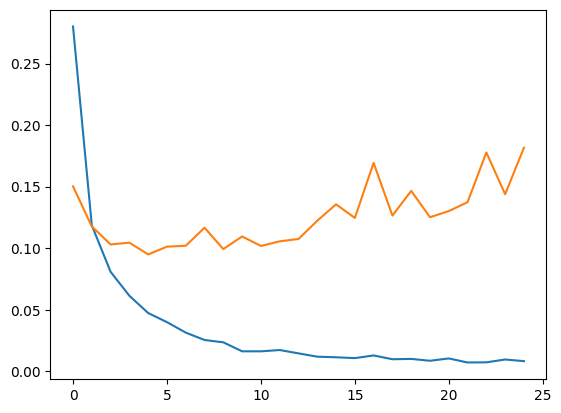

In [28]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [29]:
xTest[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

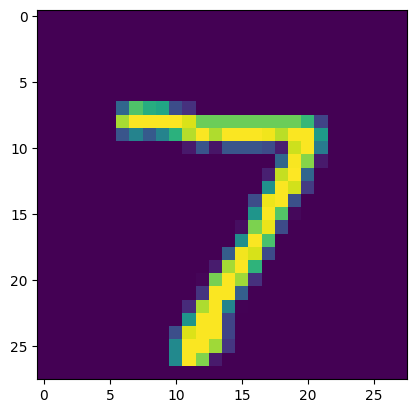

In [30]:
plt.imshow(xTest[0])

In [31]:
model.predict(xTest[0].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([7], dtype=int64)

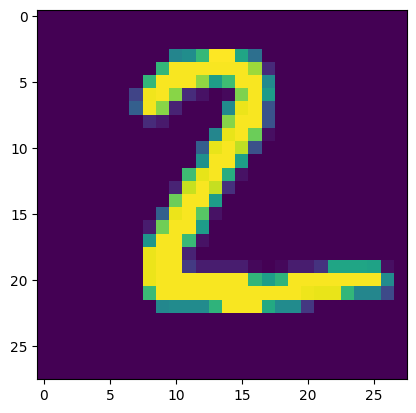

In [32]:
plt.imshow(xTest[1])

In [33]:
model.predict(xTest[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([2], dtype=int64)